<a href="https://colab.research.google.com/github/hdtran103/Stroke-Prediction-Data-/blob/main/Stroke_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Peter Tran

Data Set 2: Stroke Prediction

  Source of data: Kaggle.com (from the pre-approved data sets)

Brief description of data:
- This data provides various descriptions of the underlying factors contributing to why someone may have a stroke.

Target:
- The target variable is the prediction of whether someone will have a stroke based on underlying factors.

One row represents:
- Each row represents a different person.

Problem type:
- This is a classification problem as the goal is to predict whether an individual will have a stroke or not.

Number of features:
- The dataset has 12 attributes (features).

Number of rows in the dataset:
- There are 5110 rows in the dataset.

Challenges:
- Some potential challenges in cleaning, exploring, or modeling this dataset may include:
- Handling missing data or outliers in the dataset.
- Dealing with categorical variables and deciding how to encode or represent them in the model.
- Exploring the relationships between the features and identifying, which factors are more influential in predicting strokes.
- Balancing the dataset. if there is an imbalance between the stroke and non-stroke cases.
Selecting appropriate machine learning algorithms and evaluating their performance on the dataset.


# Import Libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
import collections

#EDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

#Pre-Processing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Regression Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Classification Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = ('/content/drive/MyDrive/CSV File/healthcare-dataset-stroke-data.xls')
stroke_df = pd.read_csv(filename)

In [4]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke_df.drop(columns = ["id"], inplace = True)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


I dropped id, because I do not see how id is related to how someone can get a stroke or not.

##Cleaning Data for Analysis
*Drop unnecessary columns

*Check for Duplicates

*Check for Categorical Issues

*Make sure Data Types Match with Data Dict

*Check for outliers/impossible numerical values

*Checking (but not fixing) missing values (will do this after train-test split)

In [6]:
stroke_df.shape
print(f'There are {stroke_df.shape[0]} rows, and {stroke_df.shape[1]} columns.')
print(f'The rows represent {stroke_df.shape[0]} observations, and the columns represent {stroke_df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 11 columns.
The rows represent 5110 observations, and the columns represent 10 features and 1 target variable.


In [7]:
stroke_df.duplicated().sum()

0

In [8]:
stroke_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
# Anything that is not frequenct "occurs more than 3% of the time" --> drop them

stroke_df["gender"].value_counts(normalize = True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [10]:
stroke_df = stroke_df[stroke_df['gender'] != 'Other']
stroke_df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [11]:
stroke_df.age = stroke_df.age.round();

In [12]:
# Change this to integers we dont neeed decimals in age --> few months would not be a factor in the study
# How to round the values in a coulmn dataframe pandas
stroke_df["age"].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
10.0     35
4.0      34
7.0      32
6.0      24
0.0      20
Name: age, Length: 83, dtype: int64

In [13]:
stroke_df["hypertension"].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [14]:
stroke_df["heart_disease"].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [15]:
stroke_df["work_type"].value_counts(normalize = True)

Private          0.572323
Self-employed    0.160305
children         0.134469
Govt_job         0.128597
Never_worked     0.004306
Name: work_type, dtype: float64

In [16]:
df = stroke_df[stroke_df['work_type'] != 'Never_worked']

In [17]:
df["work_type"].value_counts(normalize = True)

Private          0.574799
Self-employed    0.160999
children         0.135050
Govt_job         0.129153
Name: work_type, dtype: float64

In [18]:
df["Residence_type"].value_counts()

Urban    2581
Rural    2506
Name: Residence_type, dtype: int64

In [19]:
# round the values here as well....
#df.avg_glucose_level = df.avg_glucose_level.round();
x = df.avg_glucose_level.round();
#x= df["avg_glucose_level"].value_counts();
#df["avg_glucose_level"].value_counts();
print(x)
#print(collections.counter(df["avg_glucose_level"]))

0       229.0
1       202.0
2       106.0
3       171.0
4       174.0
        ...  
5105     84.0
5106    125.0
5107     83.0
5108    166.0
5109     85.0
Name: avg_glucose_level, Length: 5087, dtype: float64


In [20]:
# round the values here as well
df["bmi"].value_counts();

In [21]:
df = df.dropna(subset=["bmi"])

In [22]:
df["smoking_status"].value_counts()

never smoked       1838
Unknown            1475
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [23]:
df["stroke"].value_counts()

0    4677
1     209
Name: stroke, dtype: int64

In [24]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4886.000000,4886.000000,4886.000000,4886.000000,4886.000000,4886.000000
mean,42.989153,0.092305,0.049734,105.339073,28.909640,0.042775
std,22.534715,0.289485,0.217417,44.481347,7.853621,0.202371
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.062500,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.545000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [25]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [26]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [27]:
print(df.isna().sum()/len(df)*100)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64


#Correlation Heatmap

In [28]:
corr = stroke_df.corr(numeric_only = True)
corr.round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.25,0.13,0.13,0.13,0.04,1.00


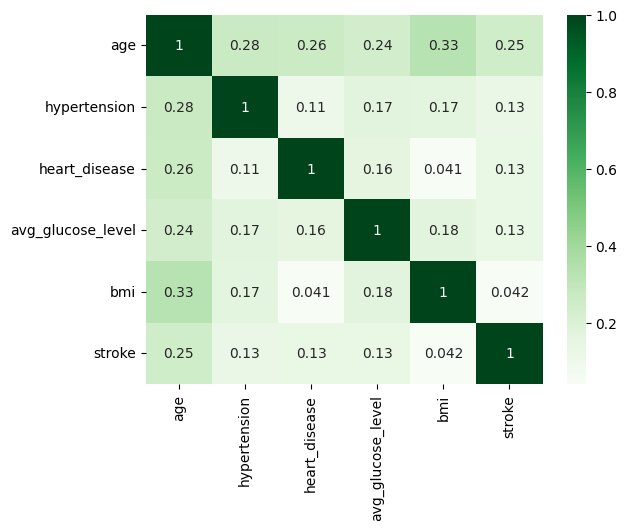

In [29]:
# Please add the numbers in the boxes for clarity --> better/quickers insights
sns.heatmap(corr, cmap = 'Greens',annot = True);

- In this heatmap, what I find really interesting is that the higher the age, the higher the other factors are.

# Histogram and Barplot - "Distribution of Hypertension in Stroke Cases".

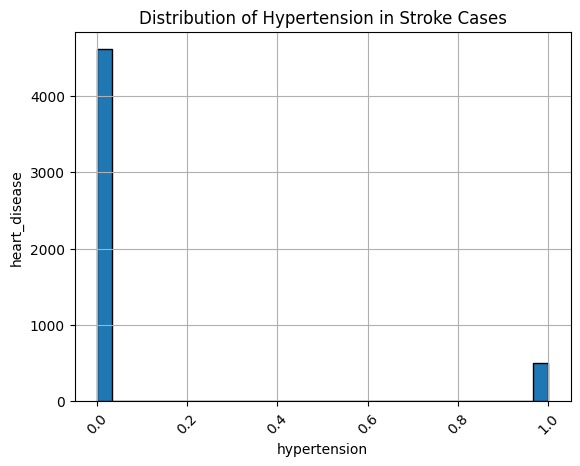

In [30]:
# Add gender as a hue

ax = stroke_df['hypertension'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title("Distribution of Hypertension in Stroke Cases")
ax.set_xlabel('hypertension')
ax.set_ylabel('heart_disease');


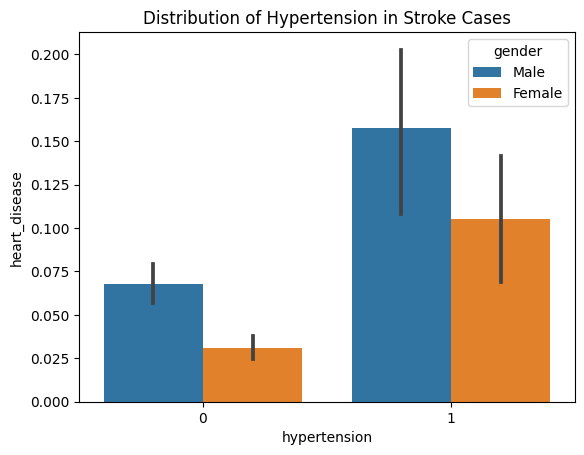

In [31]:
ax = sns.barplot(data=stroke_df, x='hypertension', y='heart_disease', hue='gender');
ax.set_title("Distribution of Hypertension in Stroke Cases");

# Multivariate Visualization: Scatterplot

In [32]:
female_filter = df['gender'] == "Female"
df_female = df.loc[female_filter]
df_female.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [33]:
df_male = df.loc[~female_filter]
df_male.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1


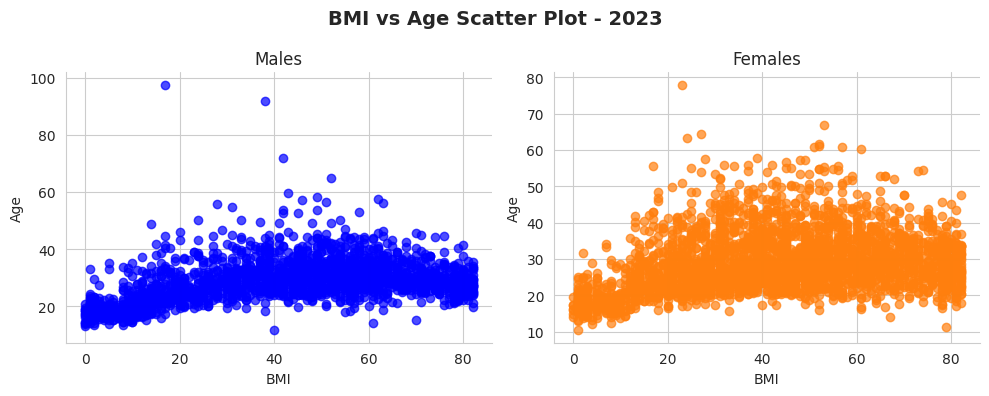

In [34]:
# Set style
sns.set_style("whitegrid")

# Create 2 side by side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Subplot 1
axes[0].scatter(df_male['age'], df_male['bmi'], color='blue', alpha=0.7)
axes[0].set_title('Males', fontsize=12)
axes[0].set_ylabel("Age")
axes[0].set_xlabel("BMI")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Subplot 2
axes[1].scatter(df_female['age'], df_female['bmi'], color='tab:orange', alpha=0.7)
axes[1].set_title('Females', fontsize=12)
axes[1].set_ylabel("Age")
axes[1].set_xlabel("BMI")
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Add a title to the figure
plt.suptitle('BMI vs Age Scatter Plot - 2023', fontsize=14, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


- I created a filter to help separate the genders so I can create two different scatterplots.
- Looking at these graphs, I can see that females tend to have higher bmi than males do as they get older. What these graphs tell me is that overall the risks for a stroke tend to higher as a person ages and when they also have a higher bmi.

# Preprocessing

In [35]:
df["gender"].replace({"Male": 0,
                           "Female": 1}, inplace = True)
df["gender"].value_counts()

1    2886
0    2000
Name: gender, dtype: int64

In [36]:
df["ever_married"].replace({"Yes": 0,
                             "No": 1}, inplace = True)
df["ever_married"].value_counts()

0    3204
1    1682
Name: ever_married, dtype: int64

In [37]:
df["Residence_type"].replace({"Urban":0,
                         "Rural":1}, inplace = True)
df["Residence_type"].value_counts()

0    2475
1    2411
Name: Residence_type, dtype: int64

In [38]:
df["work_type"].replace({"Private":0,
                         "Self-employed":1,
                         "children":2,
                         "Govt_job":3}, inplace = True)
df["work_type"].value_counts()

0    2810
1     775
2     671
3     630
Name: work_type, dtype: int64

In [39]:
df["smoking_status"].replace({"never smoked":0,
                         "Unknown":1,
                         "formerly smoked":2,
                         "smokes":3}, inplace = True)
df["smoking_status"].value_counts()

0    1838
1    1475
2     836
3     737
Name: smoking_status, dtype: int64

# Split Train/Test

In [40]:
X = df.drop(columns = "stroke").copy()
y = df["stroke"].copy()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y , random_state=42)

In [42]:
y_train.value_counts(normalize=True)

0    0.957151
1    0.042849
Name: stroke, dtype: float64

In [43]:
y_test.value_counts(normalize=True)

0    0.957447
1    0.042553
Name: stroke, dtype: float64

# Create Column Selectors

In [44]:
# instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# select the numeric columns of each type
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

# instantiate SimpleImputers with most_frequent and median strategies
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# OneHot-E

In [45]:
# instantiate one hot encoder and scaler
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

# pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# preprocessor
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = "passthrough")
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0bd17d6ec0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0bd17d62c0>)])

In [46]:
df = df[['gender']].astype({'gender': float})

# Model 1: Logistics Regression

In [47]:
# Logistic Regression
logreg = LogisticRegression(C = 10)

# Create pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)

# Train Model
logreg_pipe.fit(X_train,y_train)
print(logreg_pipe.score(X_test, y_test))

0.9574468085106383


# Tuning Logistic Regression

{1e-05: 0.9574468085106383,
 0.0001: 0.9574468085106383,
 0.01: 0.9574468085106383,
 0.1: 0.9574468085106383,
 1: 0.9574468085106383,
 10: 0.9574468085106383,
 100: 0.9574468085106383,
 1000: 0.9574468085106383}

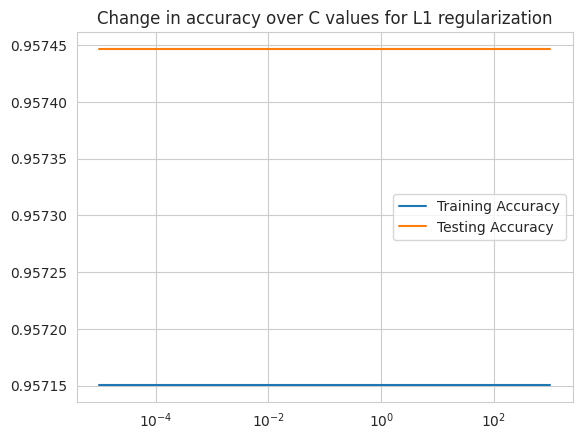

In [48]:
# Range of c values for tuning
c_values = [0.00001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000]

train_scores = []
test_scores = []

for c in c_values:
    log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
    log_reg_pipe = make_pipeline(preprocessor, log_reg)
    log_reg_pipe.fit(X_train, y_train)

    train_scores.append(log_reg_pipe.score(X_train, y_train))
    test_scores.append(log_reg_pipe.score(X_test, y_test))
# Plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1, 1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for L1 regularization')
ax.legend()

# Set the x-axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')

# Print a dictionary of values of C and accuracy scores
{c: score for c, score in zip(c_values, test_scores)}


In [49]:
logreg = LogisticRegression(C = .0001, solver='liblinear', penalty='l1')
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train,y_train)
print(logreg_pipe.score(X_test, y_test)) #this is accuracy score

0.9574468085106383


# Model 2: KNN

In [50]:
#Creating KNN Classifier

# model instance
knn = KNeighborsClassifier()
# scaling the model
knn_pipe = make_pipeline(preprocessor, knn)
# fitting the model
knn_pipe.fit(X_train, y_train)

predictions = knn_pipe.predict(X_test)

acc_score = knn_pipe.score(X_test, y_test)
acc_score

print(f"The model is {round(acc_score*100, 2)}% accurate")

The model is 95.83% accurate


In [51]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [52]:
#Tuning Classifier
# hypertuning by neighbors, tried 10-200 by 10s, then 10-30 by 1s
numNeighbors = 5
currAcc = acc_score.copy()
currI = 5
test_scores = pd.DataFrame(index=list(range(10,30)), columns=['Test Score'])
test_scores.head()

for i in range(10, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn_pipe = make_pipeline(preprocessor, knn)
  knn_pipe.fit(X_train, y_train)
  predictions = knn_pipe.predict(X_test)
  acc_score = knn_pipe.score(X_test, y_test)
  test_scores.loc[i, 'Test Score'] = acc_score

test_scores = test_scores.sort_values(by='Test Score', ascending=False)
test_scores.head()

,Test Score
13,0.958265
10,0.957447
21,0.957447
28,0.957447
27,0.957447


# Grid SearchCV

In [53]:
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

pd.DataFrame(param_grid).T

,0,1,2
max_depth,1,2,3
min_samples_leaf,3,15,20
min_samples_split,2,10,100


In [54]:
scores = {}

# Loop through all combinations of values for all hyperparameters
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6]
}

for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        for min_samples_split in param_grid['min_samples_split']:
            # Fit a model for each combination of hyperparameter values
            model = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                min_samples_split=min_samples_split
            )
            model.fit(X_train, y_train)

            # Calculate and store the accuracy score
            score = model.score(X_test, y_test)
            scores[f'max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, min_samples_split={min_samples_split}'] = score.round(6) * 100

# Display the dictionary of scores
scores


{'max_depth=3, min_samples_leaf=1, min_samples_split=2': 95.74470000000001,
 'max_depth=3, min_samples_leaf=1, min_samples_split=4': 95.74470000000001,
 'max_depth=3, min_samples_leaf=1, min_samples_split=6': 95.74470000000001,
 'max_depth=3, min_samples_leaf=2, min_samples_split=2': 95.74470000000001,
 'max_depth=3, min_samples_leaf=2, min_samples_split=4': 95.74470000000001,
 'max_depth=3, min_samples_leaf=2, min_samples_split=6': 95.74470000000001,
 'max_depth=3, min_samples_leaf=3, min_samples_split=2': 95.74470000000001,
 'max_depth=3, min_samples_leaf=3, min_samples_split=4': 95.74470000000001,
 'max_depth=3, min_samples_leaf=3, min_samples_split=6': 95.74470000000001,
 'max_depth=5, min_samples_leaf=1, min_samples_split=2': 95.74470000000001,
 'max_depth=5, min_samples_leaf=1, min_samples_split=4': 95.74470000000001,
 'max_depth=5, min_samples_leaf=1, min_samples_split=6': 95.74470000000001,
 'max_depth=5, min_samples_leaf=2, min_samples_split=2': 95.74470000000001,
 'max_depth=

In [55]:
model = DecisionTreeClassifier()

param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

In [56]:
dt_grid_search = GridSearchCV(model, param_grid)

In [57]:
dt_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [58]:
dt_grid_search.best_params_

{'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [59]:
param_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}

dt_grid_search2 = GridSearchCV(model, param_grid2)
dt_grid_search2.fit(X_train, y_train)
dt_grid_search2.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [60]:
#retrieve the best version of the model
best_model = dt_grid_search2.best_estimator_

#refit the model on the whole training set
best_model.fit(X_train, y_train)
#score the model on the test set
best_model.score(X_test, y_test)

0.9574468085106383

In [61]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [62]:
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [63]:
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [64]:
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)

knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.9574468085106383


# PCA

In [65]:
X.shape

(4886, 10)

In [66]:
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

In [67]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [69]:
transformer = make_pipeline(StandardScaler(), PCA(n_components=7))

In [70]:
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

In [71]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.9560589519650655
Testing accuracy: 0.9607201309328969


In [72]:
bagreg = BaggingClassifier()
# Create a modeling pipeline
bagreg_pipe = make_pipeline(transformer, bagreg)
bagreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('baggingclassifier', BaggingClassifier())])

In [73]:
print('Training accuracy:', bagreg_pipe.score(X_train, y_train))
print('Testing accuracy:', bagreg_pipe.score(X_test, y_test))

Training accuracy: 0.9907205240174672
Testing accuracy: 0.9590834697217676


- Best Production Model would be to use would be the KNN Classifier due to the fact that their accuracy, which would lead to higher results in producing a drug that can help prevent a stroke.